In [2]:
import numpy as np
from scipy.fft import  rfft2, irfft2,fft2,ifft2
import cv2
import pylab
from matplotlib import pyplot as plt

# Functions

In [3]:
def get_img_magnitude_phase(image):
    fftdata = fft2(image)
    fftmag = np.abs(fftdata)
    fftangle = np.angle(fftdata)
    fftphase = np.exp(np.multiply(1j,fftangle))
    return fftmag ,fftangle, fftphase

In [4]:
def plot_original_imgs(image,img_mag_data,img_phase_data):
    img_mag = ifft2(np.multiply(img_mag_data,np.exp(1+1j)))
    img_phase = ifft2(1 * img_phase_data)
    reconstructed_img = ifft2(np.multiply(img_mag_data,img_phase_data))
    
    pylab.figure(figsize=(8,8))
    pylab.subplot(2,2,1), pylab.imshow(image, cmap='gray'), pylab.title('Original Image', size=20)
    pylab.subplot(2,2,2), pylab.imshow(img_mag.real, cmap='gray')
    pylab.title('Img Magnitude', size=20)
    pylab.subplot(2,2,3), pylab.imshow(img_phase.real, cmap='gray')
    pylab.title('Img Phase', size=20)
    pylab.subplot(2,2,4), pylab.imshow(np.abs(reconstructed_img), cmap='gray')
    pylab.title('Reconstructed Image', size=20)
    pylab.show()

In [5]:
def plot_mixed_imgs(img_mag_data,img_phase_data):
    img_mag = ifft2(np.multiply(img_mag_data,np.exp(1+1j)))
    img_phase = ifft2(1 * img_phase_data)
    reconstructed_img = ifft2(np.multiply(img_mag_data,img_phase_data))
    
    pylab.figure(figsize=(8,8))
    pylab.subplot(2,2,1), pylab.imshow(img_mag.real, cmap='gray'),
    pylab.title('Magnitude', size=20)
    pylab.subplot(2,2,2), pylab.imshow(img_phase.real, cmap='gray')
    pylab.title('Phase', size=20)
    pylab.subplot(2,2,3), pylab.imshow(reconstructed_img.real, cmap='gray')
    pylab.title('Mixed Img', size=20)

    pylab.show()

# Proccess

In [6]:
def crop_2d_img(image,x1,x2,y1,y2) :
    max_height= image.shape[0]-1
#     cutted_img = np.ones_like(image)
#     cutted_img = np.full_like(image,235)
    cutted_img = np.zeros_like(image)

    for x in range(x1,x2):
        for y in range(y1,y2):
            cutted_img[max_height-y,x] = image_1[max_height-y,x]
    return cutted_img

In [50]:
img1_path = "cat.png"
img2_path = "Desert.png"
img3_path = "human_back.jpg"
img4_path = "me.jpeg"
#image reader
image_1 =cv2.imread(img1_path,0)
image_2 =cv2.imread(img3_path,0)
#image resizer
image_1 = cv2.resize(image_1, (900,600))
image_2 = cv2.resize(image_2, (900,600))

In [51]:
fftmag_1 ,fftangle_1, fftphase_1 = get_img_magnitude_phase(image_1)
fftmag_2 ,fftangle_2, fftphase_2 = get_img_magnitude_phase(image_2)

In [52]:
image_1.max()

233

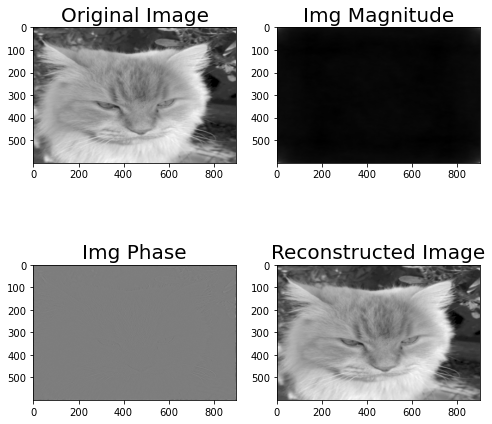

In [53]:
#Plot Original Img 1
plot_original_imgs(image_1,fftmag_1,fftphase_1)

In [54]:
# Crop image
img_1_cropped = crop_2d_img(image_1,x1,x2,y1,y2)

TypeError: crop_2d_img() takes 1 positional argument but 5 were given

In [55]:
fftmag_1_cropped ,fftangle_1_cropped, fftphase_1_cropped = get_img_magnitude_phase(img_1_cropped)
# fftmag_2_cropped ,fftangle_2_cropped, fftphase_2_cropped = get_img_magnitude_phase(image_2)

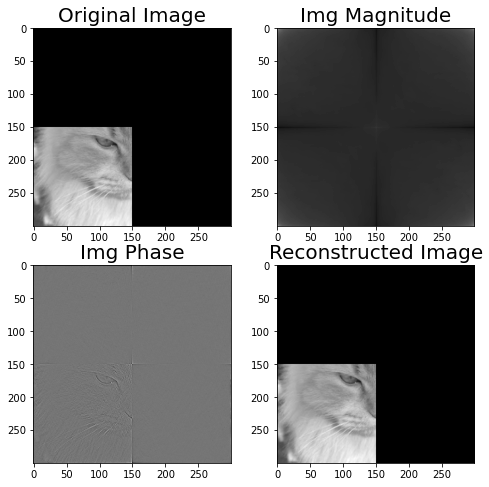

In [16]:
#Plot croped Img 1
plot_original_imgs(img_1_cropped,fftmag_1_cropped,fftphase_1_cropped)

In [19]:
image_1.shape[0]

300

In [45]:
def crop_2d_img(image,**dimenions) :
    max_width= image.shape[1]
    max_height= image.shape[0]
    x1 = dimenions["x"] * max_width /100
    x2 = x1 + (dimenions["width"] * max_width /100)
    y2 = (100- dimenions["y"] )* max_width /100
    y1 = y2 - (dimenions["height"] * max_height /100)
#     cutted_img = np.ones_like(image)
#     cutted_img = np.full_like(image,235)
    cutted_img = np.zeros_like(image)

    for x in range(int(x1),int(x2)):
        for y in range(int(y1),int(y2)):
            cutted_img[max_height-1-y,x] = image_1[max_height-1-y,x]
    return cutted_img

In [11]:
x1=0
x2=150
y1=0
y2=150

In [38]:
dimenions = {"height": 50,
"width": 50,
"x": 0,
"y": 50}

In [39]:
max_width= image_1.shape[1]
max_height= image_1.shape[0]
x1 = dimenions["x"] * max_width /100
x2 = x1 + (dimenions["width"] * max_width /100)
y2 = (100- dimenions["y"] )* max_width /100
y1 = y2 - (dimenions["height"] * max_height /100)

In [40]:
print(f"x1 ={int(x1)}")
print(f"x2 ={x2}")
print(f"y1 ={y1}")
print(f"y2 ={y2}")

x1 =0
x2 =150.0
y1 =0.0
y2 =150.0


In [46]:
# Crop image
img_1_cropped = crop_2d_img(image_1,**dimenions)

In [47]:
fftmag_1_cropped ,fftangle_1_cropped, fftphase_1_cropped = get_img_magnitude_phase(img_1_cropped)


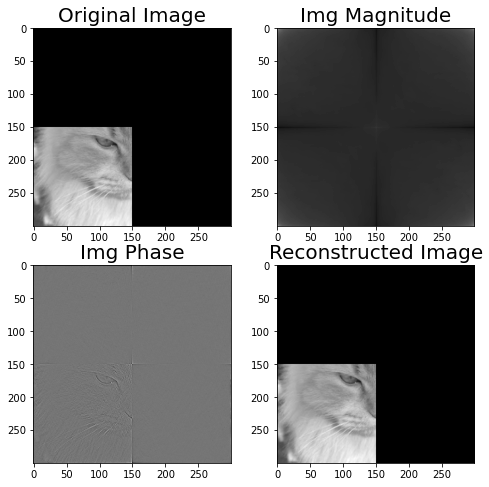

In [48]:
#Plot croped Img 1
plot_original_imgs(img_1_cropped,fftmag_1_cropped,fftphase_1_cropped)

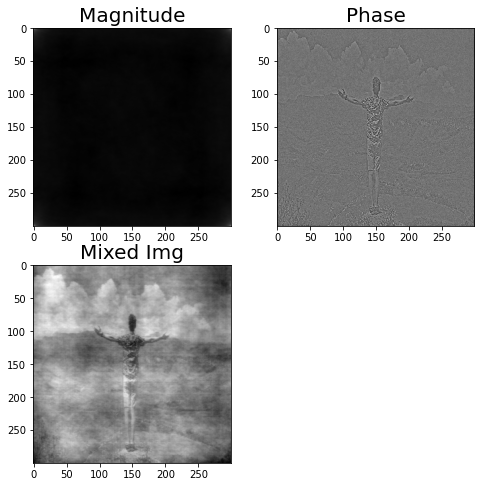

In [49]:
plot_mixed_imgs(fftmag_1,fftphase_2)

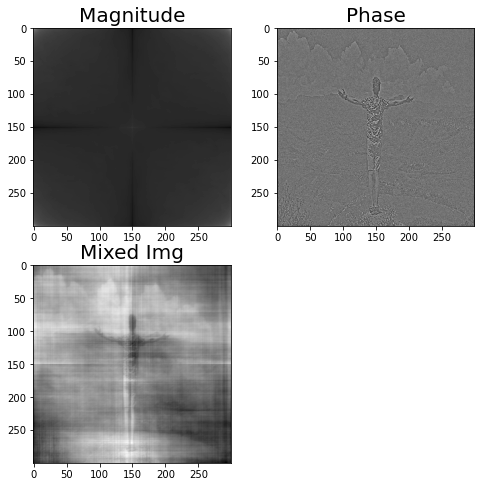

In [139]:
# Cropped mixed img mag 1 phase 2
plot_mixed_imgs(fftmag_1_cropped,fftphase_2)

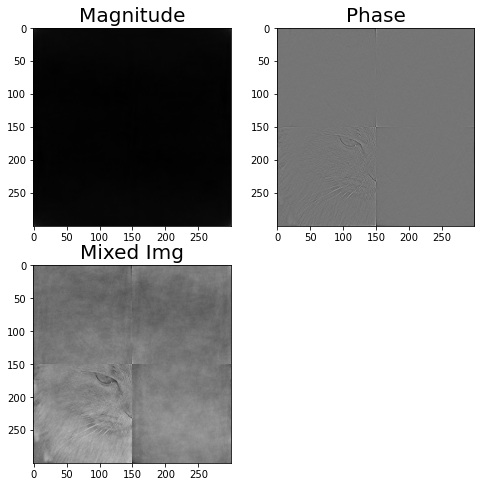

In [140]:
plot_mixed_imgs(fftmag_2,fftphase_1_cropped)

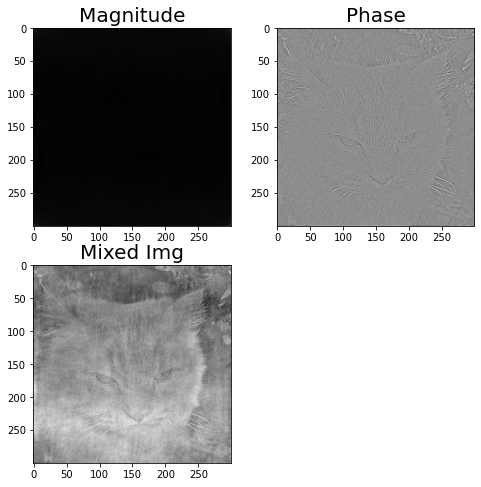

In [141]:
# Cropped mixed img mag 2 phase 1
plot_mixed_imgs(fftmag_2,fftphase_1)